In [91]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets as dsets 
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [92]:
train = dsets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())
val = dsets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor())

train_loader = DataLoader(dataset=train, batch_size=100, shuffle=True)
val_loader = DataLoader(dataset=val, batch_size=10000, shuffle=True)

In [93]:
input_size = 28 * 28
output_size = 10

In [94]:
class Sigmoid(nn.Module):

    def __init__(self, insize, outsize):
        super(Sigmoid, self).__init__()
        self.linear1 = nn.Linear(insize, 100)
        self.linear2 = nn.Linear(100, 50)
        self.linear3 = nn.Linear(50, outsize)

    def forward(self, x):
        out = torch.sigmoid(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        out = self.linear3(out)
        return out

In [95]:
class RELU(nn.Module):

    def __init__(self, insize, outsize):
        super(RELU, self).__init__()
        self.linear1 = nn.Linear(insize, 100)
        self.linear2 = nn.Linear(100, 50)
        self.linear3 = nn.Linear(50, outsize)

    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.relu(self.linear2(out))
        out = self.linear3(out)
        return out

In [96]:
class TanH(nn.Module):

    def __init__(self, insize, outsize):
        super(TanH, self).__init__()
        self.linear1 = nn.Linear(insize, 100)
        self.linear2 = nn.Linear(100, 50)
        self.linear3 = nn.Linear(50, outsize)

    def forward(self, x):
        out = torch.tanh(self.linear1(x))
        out = torch.tanh(self.linear2(out))
        out = self.linear3(out)
        return out

In [97]:
def train_model(model, epochs, learning_rate, final_lr):

    to_plot = []
    accuracy = []
    criterion = nn.CrossEntropyLoss()

    lr_decay = (final_lr - learning_rate) / int((3/4) * epochs)

    for epoch in range(epochs):
        opt = optim.SGD(model.parameters(), lr=learning_rate)

        print('EPOCH : ', epoch + 1)
        print('Batch : ', end = '')
        counter = 0
        mean_loss_list = []
        for x,y in train_loader :

            opt.zero_grad()
            x = x.view(x.shape[0], x.shape[2] * x.shape[3])
            yhat = model.forward(x)

            loss = criterion(yhat,y)
            mean_loss_list.append(loss.item())

            loss.backward()
            opt.step()

            if counter % 100 == 0 : 
                print(str(counter) + ' --> ', end = '', flush = True)
            counter += 1

        mean_loss = mean(mean_loss_list)
        to_plot.append(mean_loss)

        correct = 0
        incorrect = 0

        for x,y in val_loader :

            x = x.view(x.shape[0], x.shape[2] * x.shape[3])
            yhat = model.forward(x)

            for i in range(yhat.shape[0]):
                pred = yhat[i].argmax().item()
                actual = y[i].item()

                if pred == actual :
                    correct += 1
                else :
                    incorrect += 1
        
        acc = (correct / (correct + incorrect)) * 100
        accuracy.append(acc)

        print()
        print('Mean loss : ', mean_loss)
        print(f'Accuracy on test set : {acc} %')
        print('-' * 50)

        learning_rate = learning_rate - lr_decay

    return to_plot, accuracy

In [98]:
start_lr = 0.05
final_lr = 0.0001
epochs = 20

In [99]:
sigmoid_model = Sigmoid(input_size, output_size)
relu_model = RELU(input_size, output_size)
tanh_model = TanH(input_size, output_size)

In [100]:
sig_loss, sig_acc = train_model(sigmoid_model, epochs, start_lr, final_lr)

EPOCH :  1
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  2.292497214078903
Accuracy on test set : 30.15 %
--------------------------------------------------
EPOCH :  2
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  2.2074301532904306
Accuracy on test set : 40.25 %
--------------------------------------------------
EPOCH :  3
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  1.6179921108484268
Accuracy on test set : 57.8 %
--------------------------------------------------
EPOCH :  4
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  1.0799040046334267
Accuracy on test set : 74.25 %
--------------------------------------------------
EPOCH :  5
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.7568640932440758
Accuracy on test set : 82.41000000000001 %
--------------------------------------------------
EPOCH :  6
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.574865794

In [101]:
relu_loss, relu_acc = train_model(relu_model, epochs, start_lr, final_lr)

EPOCH :  1
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.8752045757323503
Accuracy on test set : 89.37 %
--------------------------------------------------
EPOCH :  2
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.3297490272174279
Accuracy on test set : 92.21000000000001 %
--------------------------------------------------
EPOCH :  3
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.26675420728822546
Accuracy on test set : 93.41000000000001 %
--------------------------------------------------
EPOCH :  4
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.21779868189245463
Accuracy on test set : 94.32000000000001 %
--------------------------------------------------
EPOCH :  5
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.17836411607141295
Accuracy on test set : 95.25 %
--------------------------------------------------
EPOCH :  6
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 

In [102]:
tanh_loss, tanh_acc = train_model(tanh_model, epochs, start_lr, final_lr)

EPOCH :  1
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.8058430812756221
Accuracy on test set : 89.98 %
--------------------------------------------------
EPOCH :  2
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.32895697658260664
Accuracy on test set : 92.17999999999999 %
--------------------------------------------------
EPOCH :  3
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.2709175265332063
Accuracy on test set : 92.80000000000001 %
--------------------------------------------------
EPOCH :  4
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.23283959141621988
Accuracy on test set : 93.75 %
--------------------------------------------------
EPOCH :  5
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.20124788548176487
Accuracy on test set : 94.62 %
--------------------------------------------------
EPOCH :  6
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean lo

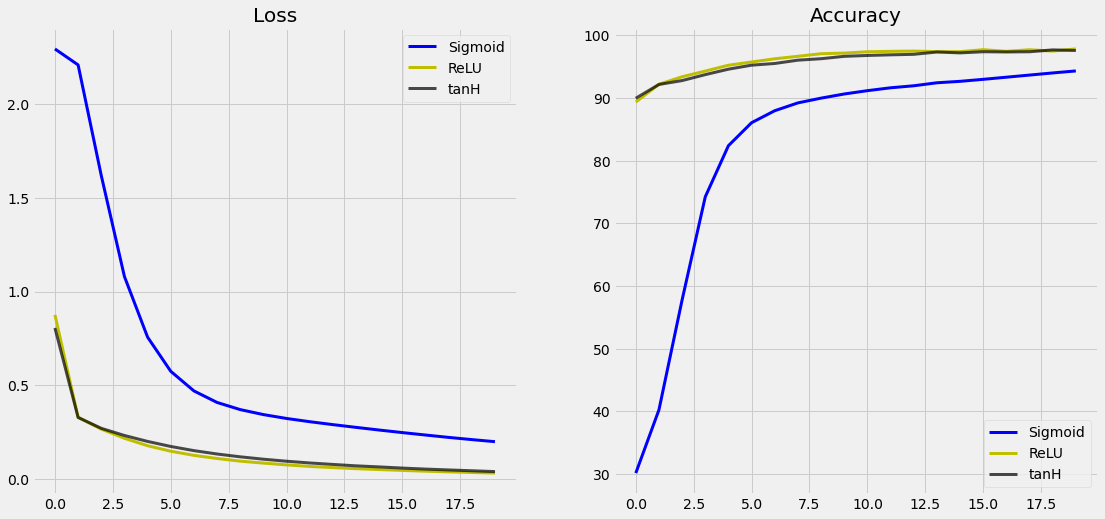

In [115]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (17,8))

ax[0].set_title('Loss')
ax[0].plot(sig_loss, label = 'Sigmoid', linewidth = 3, c = 'b')
ax[0].plot(relu_loss, label = 'ReLU', linewidth = 3, c = 'y')
ax[0].plot(tanh_loss, label = 'tanH', linewidth = 3, c = 'black', alpha = 0.7)
ax[0].legend()
ax[0].grid(True)

ax[1].set_title('Accuracy')
ax[1].plot(sig_acc, label = 'Sigmoid', linewidth = 3, c = 'b')
ax[1].plot(relu_acc, label = 'ReLU', linewidth = 3, c = 'y')
ax[1].plot(tanh_acc, label = 'tanH', linewidth = 3, c = 'black', alpha = 0.7)
ax[1].legend()
ax[1].grid(True)